In [34]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#读取数据
df = pd.read_csv(r'.\traindata.csv')
#查看数据缺失情况：
print(df.isnull().any())
#对无效字符"?"进行处理，在这里我们使用众数替代
for column in df.columns:
    mode=df[column].mode()[0]
    df[column].replace('?',mode,inplace=True)
#剔除无用的特征,在原本的居民收入数据集中，关于受教育程度的有两个变量，一个是education（教育水平），另一个是education.num（受教育时长），而且这两个变量的值都是一一对应的，只不过一个是字符型，另一个是对应的数值型，如果将这两个变量都包含在模型中的话，就会产生信息的冗余；fnlwgt变量代表的是一种序号，其对收入水平的高低并没有实际意义。故为了避免冗余信息和无意义变量对模型的影响，考虑将education变量和fnlwgt变量从数据集中删除。
print(df[['education','education.num']].value_counts())
df=df.drop(['fnlwgt','education'],axis=1)
# 处理重复行
# dup_row=df.duplicated()
# df.insert(0, 'is_dup', dup_row)
# df[df['is_dup'] == True]

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
dtype: bool
education     education.num
HS-grad       9                7367
Some-college  10               5060
Bachelors     13               3742
Masters       14               1193
Assoc-voc     11                970
11th          7                 840
Assoc-acdm    12                752
10th          6                 641
7th-8th       4                 451
Prof-school   15                414
9th           5                 374
Doctorate     16                297
12th          8                 292
5th-6th       3                 239
1st-4th       2                 121
Preschool     1                  39
Name: count, dtype: int64


In [3]:
#数值型变量统计描述
df.describe()
#结果描述了有关数值型变量的简单统计值，包括非缺失观测的个数（count）、平均值（mean）、标准差（std）、最小值（min）、下四分位数（25%）、中位数（50%）、上四分位数（75%）和最大值（max）。

,age,education.num,capital.gain,capital.loss,hours.per.week
count,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.514918,10.075509,1048.223192,85.975123,40.455291
std,13.640207,2.584257,7226.283048,400.471450,12.312654
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


In [4]:
#离散型变量统计描述
df.describe(include= ['object'])

,workclass,marital.status,occupation,relationship,race,sex,native.country
count,22792,22792,22792,22792,22792,22792,22792
unique,8,7,14,6,5,2,40
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,17157,10452,4190,9207,19476,15258,20841


In [5]:
path="D:\PythonProject\data\\trainlabel.txt"
with open(path,"r") as f:
    content=f.readlines()
target=[]
for item in content:
    target.append(int(item))
target=np.array(target)

<Axes: ylabel='Density'>

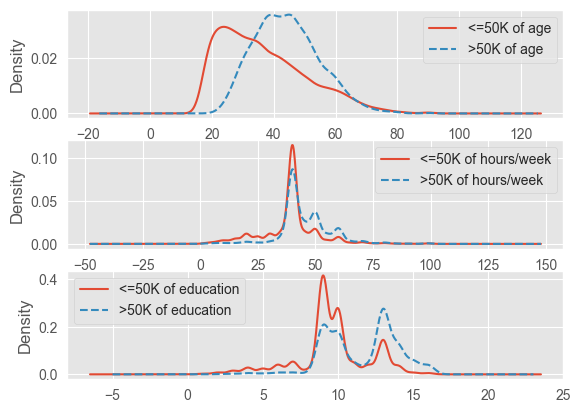

In [6]:
#以被调查居民的年龄和每周工作小时数为例，绘制各自的分布形状图：
import matplotlib.pyplot as plt
low=[]
high=[]
for i in range(len(target)):
    item=target[i]
    if item==0:
        low.append(i)
    else:
        high.append(i)
# 设置绘图风格
plt.style.use('ggplot')

# 设置多图形的组合
fig, axes = plt.subplots(3,1)

# 绘制不同收入水平下的年龄核密度图，观察连续型变量的分布情况
df.age[low].plot(kind = 'kde', label = '<=50K of age', ax = axes[0], legend = True, linestyle = '-')
df.age[high].plot(kind = 'kde', label = '>50K of age', ax = axes[0], legend = True, linestyle = '--')

# 绘制不同收入水平下的周工作小时核密度图
df['hours.per.week'][low].plot(kind = 'kde', label = '<=50K of hours/week', ax = axes[1], legend = True, linestyle = '-')
df['hours.per.week'][high].plot(kind = 'kde', label = '>50K of hours/week', ax = axes[1], legend = True, linestyle = '--')


# 绘制不同收入水平下的受教育时长核密度图
df['education.num'][low].plot(kind = 'kde', label = '<=50K of education', ax = axes[2], legend = True, linestyle = '-')
df['education.num'][high].plot(kind = 'kde', label = '>50K of education', ax = axes[2], legend = True, linestyle = '--')


In [7]:
# 离散型变量的重编码,将字符型的值转换为整数型的值
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes
df.head(10)
df=df.values
#上面为离散变量的统计值，包含每个变量非缺失观测的数量（count）、不同离散值的个数（unique）、出现频次最高的离散值（top）和最高频次数（freq）。
# path="D:\PythonProject\data\\trainlabel.txt"
# with open(path,"r") as f:
#     content=f.readlines()
# target=[]
# for item in content:
#     target.append(int(item))
# num_columns=['age','education.num','capital.gain','capital.loss','hours.per.week']
# cat_columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
# #将target转换为numpy.array
# target=np.array(target)
# #离散型变量进行热编码
# encode_df = pd.get_dummies(df,columns=cat_columns)
# #连续型变量归一化
# # 对连续型变量进行z-score标准化，经处理数据符合标准正态分布，均值为0，标准差为1,然后，删除未标准化数据，将标准化后数据合并。
# num_mean=encode_df[num_columns].mean()
# num_std=encode_df[num_columns].std()
# num_normal=(encode_df[num_columns]-num_mean)/num_std
# encode_df=encode_df.drop(columns=num_columns)
# encode_df=pd.concat([encode_df,num_normal],axis=1)
# features=encode_df.columns
# encode_df=encode_df.values

In [8]:
# encode_df
from sklearn.model_selection import StratifiedShuffleSplit #分层交叉验证
#使用分层交叉验证的方式，将整个数据集划分为训练集（train）和测试集（test）。
sss=StratifiedShuffleSplit(n_splits=2,train_size=0.75)
for train_index,test_index in sss.split(df,target):
    trainx,testx = df[train_index],df[test_index]
    trainy,testy = target[train_index],target[test_index]
###############################################################################################

col_0     0    1
row_0           
0      3909  532
1       417  840
kn score in train: 0.886041886041886
kn score in test: 0.8334503334503335


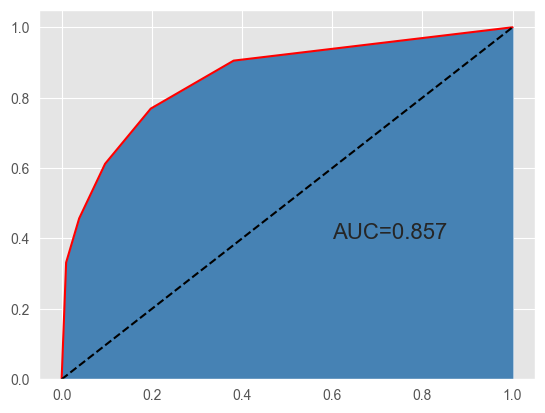

In [9]:
# 导入K近邻模型的类
from sklearn.neighbors import KNeighborsClassifier

# 构建K近邻模型
kn = KNeighborsClassifier()
kn.fit(trainx,trainy)
kn_pred = kn.predict(testx)
print(pd.crosstab(kn_pred, testy))
print("kn score in train:",kn.score(trainx,trainy))
print("kn score in test:",kn.score(testx,testy))

from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, kn.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

col_0      0     1
row_0             
0      12351  1634
1        626  2483
gbdt score in train: 0.8677898677898678
gbdt score in test: 0.862056862056862


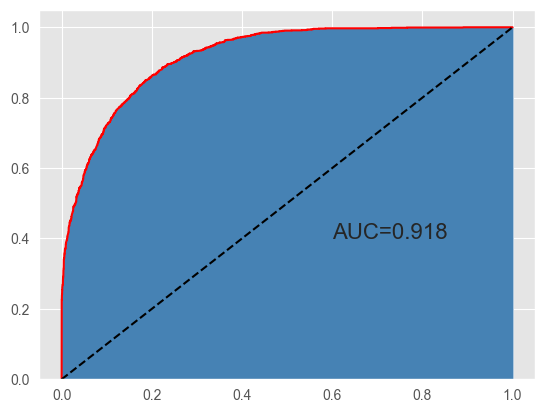

In [10]:
# 导入梯度提升决策树模型的类
from sklearn.ensemble import GradientBoostingClassifier
#构建GBDT模型
gbdt = GradientBoostingClassifier()
gbdt.fit(trainx, trainy)
gbdt_pred=gbdt.predict(trainx)
print(pd.crosstab(gbdt_pred, trainy))
print("gbdt score in train:",gbdt.score(trainx,trainy))
print("gbdt score in test:",gbdt.score(testx,testy))
from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, gbdt.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

accuracy {'n_neighbors': 10} 0.843804180824599
col_0      0     1
row_0             
0      12377  1655
1        600  2462
grid_kn score in train: 0.868082368082368
grid_kn score in test: 0.8411723411723412


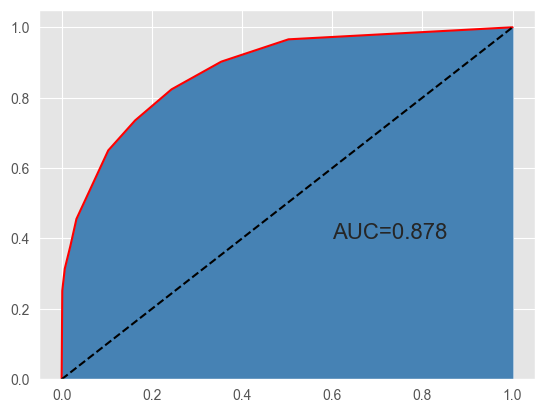

In [11]:
# K 近邻模型网格搜索法
# 导入网格搜索函数
from sklearn.model_selection import GridSearchCV
# 选择不同的参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
# 搜索不同的K值
grid_kn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=parameters, cv=10, scoring='accuracy')
grid_kn.fit(trainx, trainy)
grid_kn_pred=grid_kn.predict(trainx)
# 结果输出
print(grid_kn.scoring, grid_kn.best_params_, grid_kn.best_score_)
print(pd.crosstab(grid_kn_pred, trainy))
print("grid_kn score in train:",grid_kn.score(trainx,trainy))
print("grid_kn score in test:",grid_kn.score(testx,testy))
from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, grid_kn.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

0.8015093015093016
0.7137592137592138
0.7774657774657775


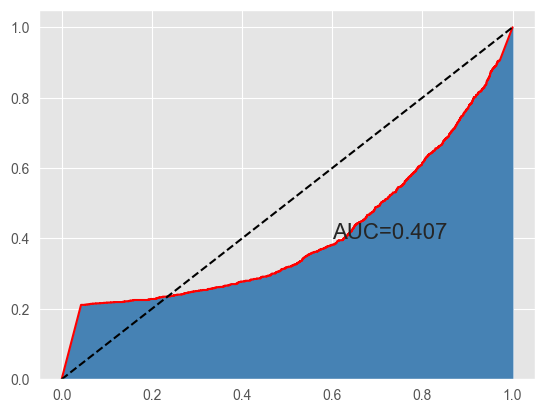

In [31]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
# 创建朴素贝叶斯分类器
gnb_clf = GaussianNB()
bnb_clf = BernoulliNB()
mnb_clf = MultinomialNB()
# 使用样本数据训练三种朴素贝叶斯模型
gnb_clf.fit(trainx, trainy)
print(gnb_clf.score(testx,testy))

bnb_clf.fit(trainx, trainy)
print(bnb_clf.score(testx,testy))

mnb_clf.fit(trainx, trainy)
print(mnb_clf.score(testx,testy))
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, mnb_clf.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

0.8051948051948052


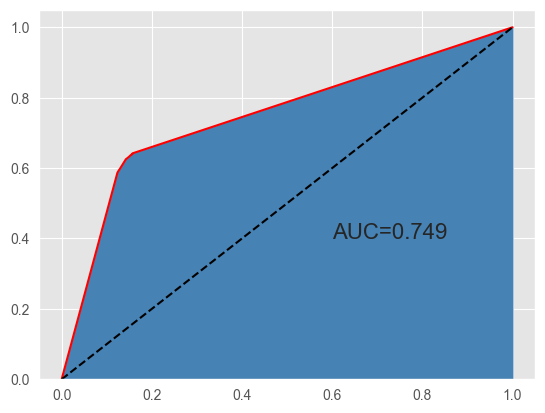

In [28]:
##单一决策树
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(trainx,trainy)
print(model.score(testx,testy))
from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, model.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

In [15]:
# GBDT 模型的网格搜索法
# 选择不同的参数
from sklearn.model_selection import GridSearchCV
learning_rate_options = [0.01, 0.05, 0.1]
max_depth_options = [3,5,7,9]
n_estimators_options = [100, 300, 500]

parameters = {'learning_rate':learning_rate_options,
             'max_depth':max_depth_options,
             'n_estimators':n_estimators_options}
grid_gbdt = GridSearchCV(estimator= GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
grid_gbdt.fit(trainx, trainy)

grid_gdbt score: 0.8706563706563707


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300} 0.8722364913649445
col_0      0     1
row_0             
0      12382  1225
1        595  2892
grid_gbdt score in train: 0.8935298935298935
grid_gbdt score in test: 0.8706563706563707


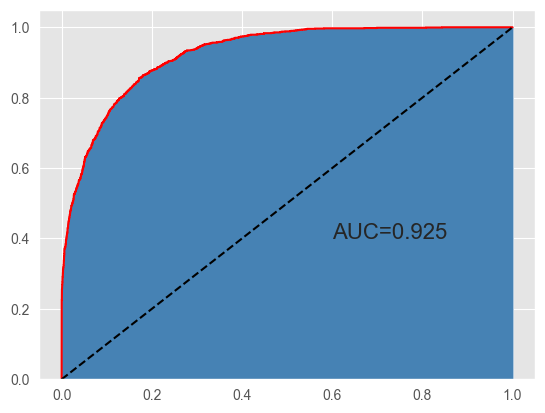

In [16]:
# 结果输出
print(grid_gbdt.best_params_, grid_gbdt.best_score_)
grid_gbdt_pred=grid_gbdt.predict(trainx)
print(pd.crosstab(grid_gbdt_pred, trainy))
print("grid_gbdt score in train:",grid_gbdt.score(trainx,trainy))
print("grid_gbdt score in test:",grid_gbdt.score(testx,testy))
from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, grid_gbdt.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

In [53]:
#读取testdata，进行预测
df = pd.read_csv(r'.\testdata.csv')
#查看数据缺失情况：
# print(df.isnull().any())
#对无效字符"?"进行处理，在这里我们使用众数替代
for column in df.columns:
    mode=df[column].mode()[0]
    df[column].replace('?',mode,inplace=True)
#剔除无用的特征,在原本的居民收入数据集中，关于受教育程度的有两个变量，一个是education（教育水平），另一个是education.num（受教育时长），而且这两个变量的值都是一一对应的，只不过一个是字符型，另一个是对应的数值型，如果将这两个变量都包含在模型中的话，就会产生信息的冗余；fnlwgt变量代表的是一种序号，其对收入水平的高低并没有实际意义。故为了避免冗余信息和无意义变量对模型的影响，考虑将education变量和fnlwgt变量从数据集中删除。
# print(df[['education','education.num']].value_counts())
df=df.drop(['fnlwgt','education'],axis=1)
# 离散型变量的重编码,将字符型的值转换为整数型的值
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes
df=df.values
#####################这里转换模型预测##############################
test_label=grid_gbdt.predict(df)
################################################
path=".\\testlabel1.txt"
np.savetxt(path,test_label,fmt='%d')